In [1]:
import anndata
data = anndata.read_h5ad('/orangedata/Images2024/Zach/MouseBrainAtlas/WTM02_3.1.A_2.3.B_3.3.D_1.2.E_2024Apr01/fishdata_2024Apr015f/Processing/WellB-Section1/anndata/anndata.h5ad')
data

AnnData object with n_obs × n_vars = 53742 × 28
    obs: 'label', 'stage_x', 'stage_y', 'image_x', 'image_y', 'size', 'section_index', 'dapi', 'sum', 'louvain', 'louvain_colors'
    var: 'readout', 'hybe', 'channel'
    uns: 'louvain', 'neighbors', 'umap'
    obsm: 'X_umap'
    layers: 'nuc_processed_vectors', 'nuc_raw', 'processed_vectors', 'raw'
    obsp: 'connectivities', 'distances'

In [28]:
from dredFISH.Utils.geomu import *

In [25]:
import numpy as np
xy = np.stack([np.array(data.obs['stage_x']).ravel(),np.array(data.obs['stage_y']).ravel()]).T
xy.shape

(53742, 2)

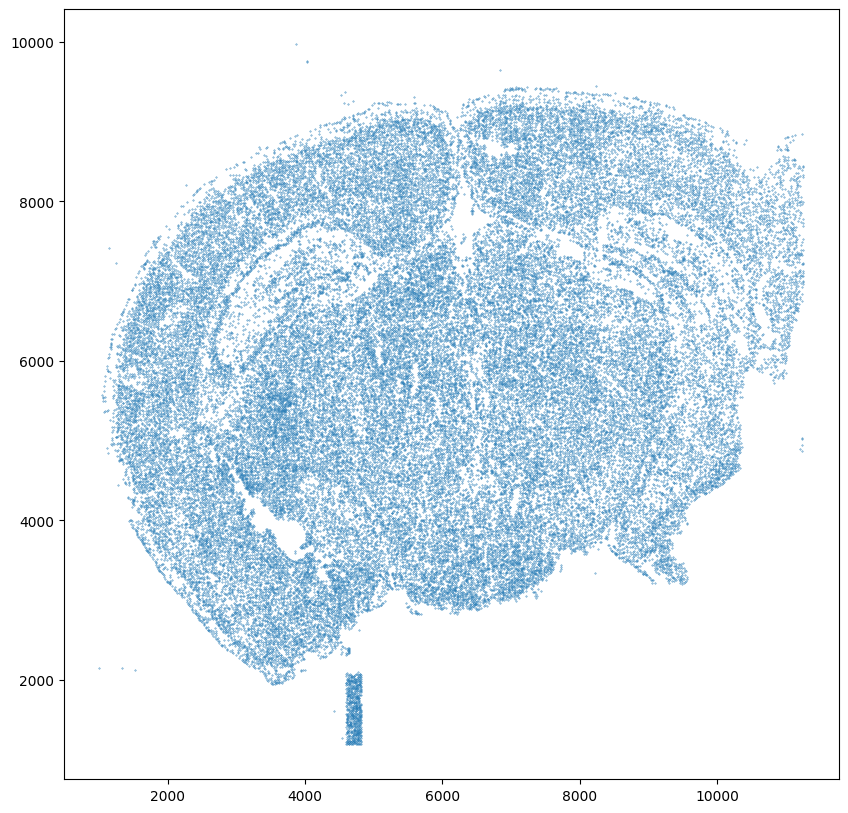

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.scatter(xy[:,0],xy[:,1],s=0.1)
plt.show()

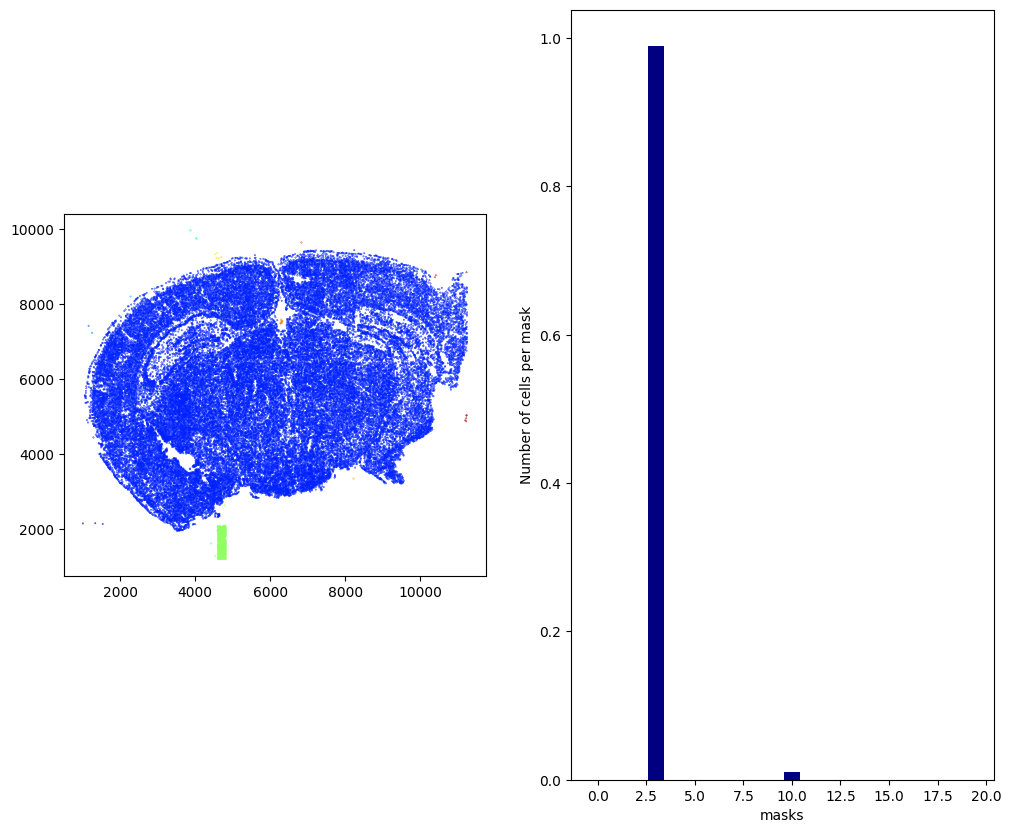

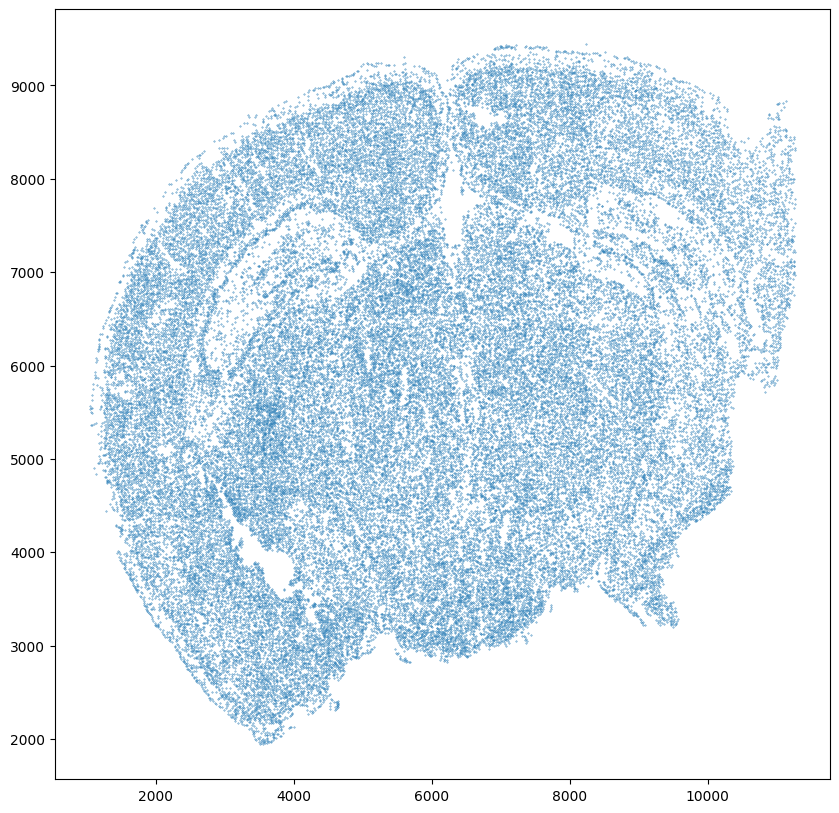

In [36]:
m = in_graph_large_connected_components(xy,Section = None,max_dist = 100,large_comp_def = 0.8,plot_comp = True)
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.scatter(xy[m,0],xy[m,1],s=0.1)
plt.show()

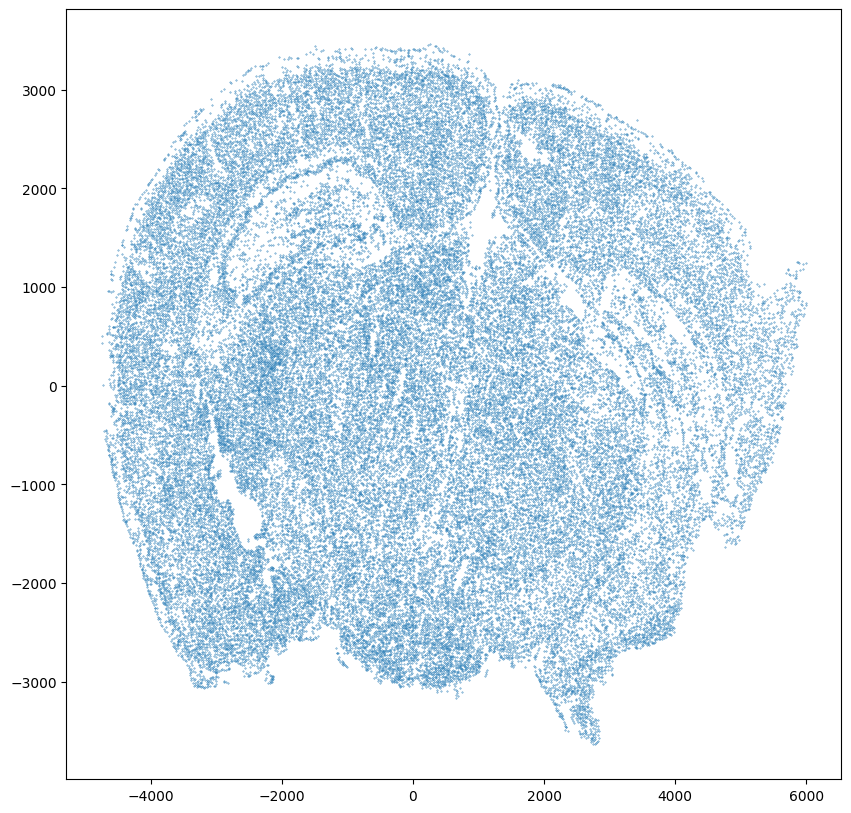

In [37]:
angle,rot_xy = find_rotation_angle(xy[m,:],return_points=True)
plt.figure(figsize=[10,10])
plt.scatter(rot_xy[:,0],rot_xy[:,1],s=0.1)
plt.show()

In [41]:
def rotate_points(X, Y, n_degrees):
    """
    Rotates a set of coordinates (X, Y) around the origin (0, 0) by n degrees.

    Args:
        X: A list of x-coordinates.
        Y: A list of y-coordinates.
        n_degrees: The rotation angle in degrees.

    Returns:
        A tuple of lists containing the rotated x and y coordinates.

    Raises:
        ValueError: If the lengths of X and Y are not equal.
    """

    if len(X) != len(Y):
        raise ValueError("X and Y coordinates must have the same length.")

    n_radians = math.radians(n_degrees)  # Convert degrees to radians
    cos_theta = math.cos(n_radians)
    sin_theta = math.sin(n_radians)

    rotated_x = []
    rotated_y = []
    for x, y in zip(X, Y):
        new_x = x * cos_theta - y * sin_theta
        new_y = x * sin_theta + y * cos_theta
        rotated_x.append(new_x)
        rotated_y.append(new_y)

    return np.array(rotated_x), np.array(rotated_y)

[0.26041281 0.00688712] 88.48505470334769 (array([2.16840434e-17]), array([0.26050387]))


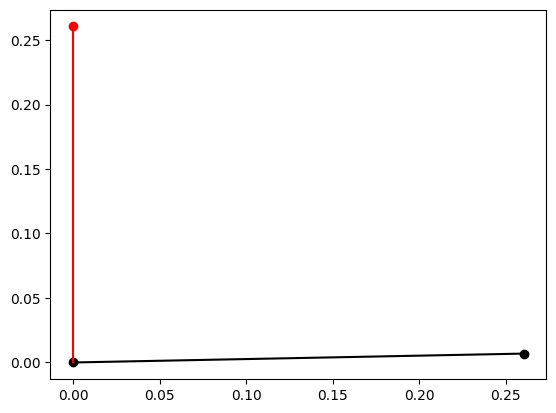

In [69]:
center = np.array([0,0])
top = np.array([np.random.rand(),np.random.rand()])

top_vector = top - center
# Calculate the angle of rotation needed to make the line vertical with the top point at the top
angle = np.arctan2(top_vector[0], top_vector[1]) * 180 / np.pi
new_top = rotate_points([top[0]],[top[1]],angle)
print(top,angle,new_top)
plt.scatter(center[0],center[1],c='k')
plt.scatter(top[0],top[1],c='k')
plt.scatter(new_top[0],new_top[1],c='r')
plt.plot([center[0], top[0]], [center[1], top[1]], c='k')
plt.plot([center[0], new_top[0]], [center[1], new_top[1]], c='r')
plt.show()

In [8]:
df_points = pd.read_csv('/orangedata/Images2024/Zach/MouseBrainAtlas/WTF01_1.2.A_2.2.B_3.2.C_4.2.D_5.2.E_6.2.F_2024Apr08/Registration/WellE-Section3/matrix/Registration_WellE-Section3_df_points_matrix.csv',index_col=0)
print(df_points)
""" Fit Model """
combined_input = np.c_[df_points['mov_y'], df_points['mov_z']]
print(combined_input.shape)
print(np.array(df_points['fix_z']).shape)
Z_model = Rbf(np.array(df_points['mov_y']),np.array(df_points['mov_z']), np.array(df_points['fix_z']))
Z_model(np.array(df_points['mov_y']),np.array(df_points['mov_z']))-np.array(df_points['fix_z'])

       fix_z     fix_y     mov_z     mov_y
0   0.026692  1.010474  0.100252  0.997058
1  -0.003244  7.213968  0.163102  6.785198
2  -2.517821  7.351388 -2.005224  7.461734
3   2.481398  7.410282  2.017178  7.612075
4  -4.792915  4.367428 -4.362101  4.429851
5   4.696617  4.347797  4.594030  4.279510
6  -1.051211  2.796923 -0.716798  2.926438
7   1.014415  2.796923  1.168703  3.076780
8   0.026507  5.250837  0.100252  5.507297
9  -2.248675  4.387060 -1.942374  4.780647
10  2.361562  4.426322  2.394279  4.780647
11 -3.805378  1.913514 -2.916550  1.623480
12  4.038012  2.168721  3.871255  2.224846
13 -3.775442  6.153878 -3.545050  6.409345
14  3.678773  6.409085  3.714130  6.760141
(15, 2)
(15,)


array([-2.66453526e-15,  1.73906028e-15,  0.00000000e+00, -1.77635684e-15,
        0.00000000e+00, -2.66453526e-15, -8.88178420e-16, -6.66133815e-16,
        9.43689571e-16, -1.77635684e-15,  0.00000000e+00, -4.44089210e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [1]:
from dredFISH.Registration.Registration import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
model = LinearRegression()
fname = '/home/zach/PythonRepos/dredFISH/dredFISH/Registration/Notebooks/test.pkl'
with open(fname,'')

In [71]:
from dredFISH.Registration.Registration import *
""" /orangedata/Images2024/Zach/dredFISH/Notebooks/reference_sections_2024Mar06.ipynb"""
download_base = '/orangedata/ExternalData/Allen_WMB_2024Mar06'
reference_data = torch.load(os.path.join(download_base,'minimal_spatial_data.pt'))
reference_data = pd.DataFrame(reference_data.numpy(),columns=['ccf_x','ccf_y','ccf_z','cluster_alias'])
reference_data['cluster_alias'] = reference_data['cluster_alias'].astype(int)

pivot_table = pd.read_csv(os.path.join(download_base,'pivot_table.csv'))

colormap = dict(zip(pivot_table['cluster_alias'],pivot_table['subclass_color']))
reference_data['color'] = reference_data['cluster_alias'].map(colormap)
reference_data

2024-04-18 12:00:36.131764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.5/lib64:
2024-04-18 12:00:36.131865: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,ccf_x,ccf_y,ccf_z,cluster_alias,color
0,7.495417,2.445872,1.743854,1408,#3D53CC
1,9.227966,6.133693,0.486187,4218,#9B7ACC
2,9.344912,6.989939,0.291452,4218,#9B7ACC
3,10.977068,4.398568,2.405989,4218,#9B7ACC
4,8.997138,6.798329,0.115985,4218,#9B7ACC
...,...,...,...,...,...
8879863,9.681244,4.453979,4.859184,5255,#994567
8879864,9.676999,4.291647,4.811681,14939,#3DCCB1
8879865,9.678760,4.363282,4.817130,5261,#653D66
8879866,9.678641,4.360346,4.810017,5252,#994567


In [76]:
negative_reference_data = reference_data.copy()
negative_reference_data['ccf_z'] = -negative_reference_data['ccf_z']
whole_reference_data = pd.concat([reference_data,negative_reference_data],ignore_index=True)
whole_reference_data

,ccf_x,ccf_y,ccf_z,cluster_alias,color
0,7.495417,2.445872,1.743854,1408,#3D53CC
1,9.227966,6.133693,0.486187,4218,#9B7ACC
2,9.344912,6.989939,0.291452,4218,#9B7ACC
3,10.977068,4.398568,2.405989,4218,#9B7ACC
4,8.997138,6.798329,0.115985,4218,#9B7ACC
...,...,...,...,...,...
17759731,9.681244,4.453979,-4.859184,5255,#994567
17759732,9.676999,4.291647,-4.811681,14939,#3DCCB1
17759733,9.678760,4.363282,-4.817130,5261,#653D66
17759734,9.678641,4.360346,-4.810017,5252,#994567


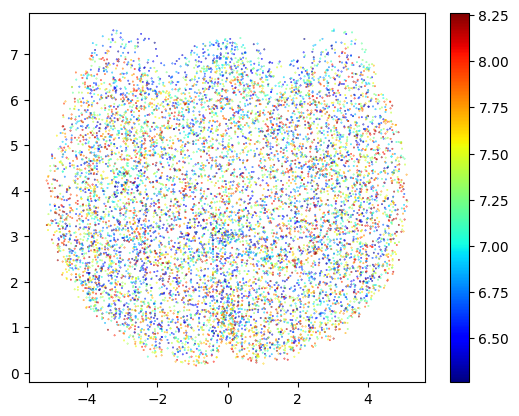

In [77]:
sample = np.random.choice(whole_reference_data[np.abs(whole_reference_data['ccf_x']-whole_reference_data['ccf_x'].mean())<1].index,10000)
plt.scatter(whole_reference_data['ccf_z'].loc[sample],whole_reference_data['ccf_y'].loc[sample],c=whole_reference_data['ccf_x'].loc[sample],cmap='jet',s=0.1)
plt.colorbar()
plt.show()

y = 0.5x + 7.0


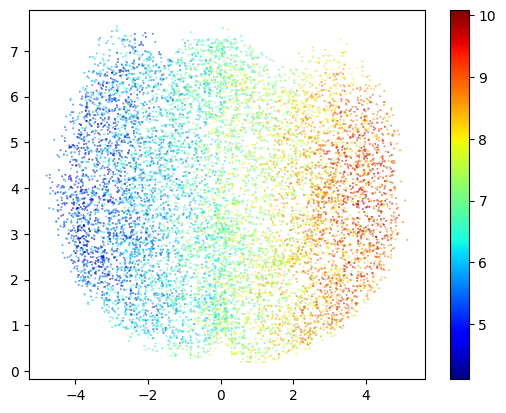

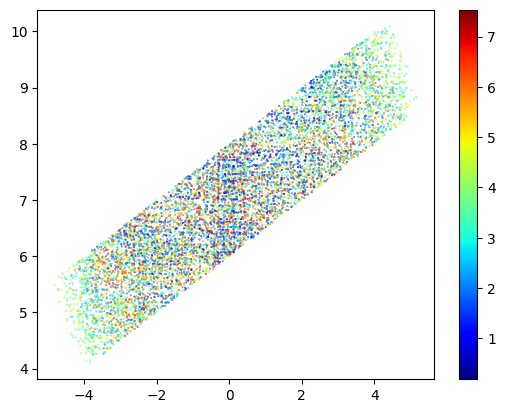

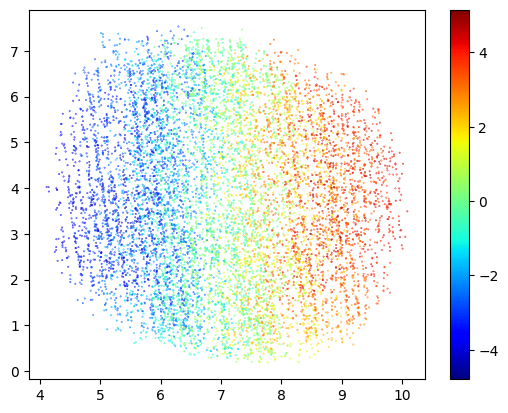

In [79]:
left_point = np.array([-2,6])
right_point = np.array([2,8])
# Generate an equation for the line that fits the left_point and right_point
m = (right_point[1] - left_point[1]) / (right_point[0] - left_point[0])
b = left_point[1] - m * left_point[0]
line_equation = f'y = {m}x + {b}'
print(line_equation)

distance = whole_reference_data['ccf_x'] - (m*whole_reference_data['ccf_z']+b)

sample = np.random.choice(whole_reference_data[np.abs(distance)<1].index,10000)
plt.scatter(whole_reference_data['ccf_z'].loc[sample],whole_reference_data['ccf_y'].loc[sample],c=whole_reference_data['ccf_x'].loc[sample],cmap='jet',s=0.1)
plt.colorbar()
plt.show()

plt.scatter(whole_reference_data['ccf_z'].loc[sample],whole_reference_data['ccf_x'].loc[sample],c=whole_reference_data['ccf_y'].loc[sample],cmap='jet',s=0.1)
plt.colorbar()
plt.show()

plt.scatter(whole_reference_data['ccf_x'].loc[sample],whole_reference_data['ccf_y'].loc[sample],c=whole_reference_data['ccf_z'].loc[sample],cmap='jet',s=0.1)
plt.colorbar()
plt.show()

In [81]:
coordiantes = []
X = np.array([1,1,-1,-1])
for z in [-2,2]:
    for y in [6,3]:
        x = X[len(coordiantes)]#float(robust_input(f" Enter Desired Section for [{str(z)},{str(y)}]",dtype='float'))
        coordiantes.append(np.array([x,y,z]))
print(coordiantes)
# Generate an equation for the plane that fits the given coordinates
A = np.vstack([np.array(coordiantes)[:,0], np.array(coordiantes)[:,1], np.ones(len(coordiantes))]).T
B = -np.array(coordiantes)[:,2]
a, b, c, d = np.linalg.lstsq(A, B, rcond=None)[0]
plane_equation = f"{a}x + {b}y + {c}z + {d} = 0"
plane_equation = f"({b}y + {c}z + {d})/{a} = x" # To predict X
print("Equation of the plane:", plane_equation)
""" Create Plane and pull reference Cells from within plane window"""

[array([ 1,  6, -2]), array([ 1,  3, -2]), array([-1,  6,  2]), array([-1,  3,  2])]


ValueError: not enough values to unpack (expected 4, got 3)

In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression

def fit_plane_and_predict_x(xyz_data, y, z):
  """
  Fits a linear plane to the given XYZ coordinates and predicts the X value
  for a given Y and Z.

  Args:
      xyz_data (numpy.ndarray): A 2D array of shape (n_samples, 3) containing the
          XYZ coordinates.
      y (float): The Y value for which to predict X.
      z (float): The Z value for which to predict X.

  Returns:
      float: The predicted X value.
  """

  # Extract X, Y, and Z coordinates
  X = xyz_data[:, 0]
  Y = xyz_data[:, 1]
  Z = xyz_data[:, 2]

  # Create a design matrix with a column of ones for the constant term
#   design_matrix = np.c_[X, Y, np.ones(X.shape[0])]
  design_matrix = np.c_[X, Y]

  # Use scikit-learn's LinearRegression for efficient plane fitting
  model = LinearRegression()
  model.fit(design_matrix, Z)

  # Predict X for the given Y and Z
  predicted_x = model.predict([[y, z]])[0]#   predicted_x = model.predict([[y, z, 1]])[0]

  return predicted_x

# Example usage
# Assuming you have your XYZ data in a list of lists
xyz_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Sample Y and Z values for prediction
y_value = 5.5
z_value = 7.2

# Predict the X value
predicted_x = fit_plane_and_predict_x(np.array(xyz_data), y_value, z_value)

print(f"Predicted X value for Y={y_value} and Z={z_value} is: {predicted_x}")


Predicted X value for Y=5.5 and Z=7.2 is: 7.849999999999999


In [4]:
start = 0.16
step = 0.2
for c in range(6):
    for i in range(4):
        print(c+1,i+1,round(start+((c*4)+i)*step,2))

1 1 0.16
1 2 0.36
1 3 0.56
1 4 0.76
2 1 0.96
2 2 1.16
2 3 1.36
2 4 1.56
3 1 1.76
3 2 1.96
3 3 2.16
3 4 2.36
4 1 2.56
4 2 2.76
4 3 2.96
4 4 3.16
5 1 3.36
5 2 3.56
5 3 3.76
5 4 3.96
6 1 4.16
6 2 4.36
6 3 4.56
6 4 4.76
